In [ ]:
#!pip install kaggle
#!pip install pandas
#!pip install matplotlib
#!pip install sklearn

In [ ]:
!kaggle datasets download -d apoorvaappz/global-super-store-dataset

In [158]:
!unzip global-super-store-dataset.zip

Archive:  global-super-store-dataset.zip
  inflating: Global_Superstore2.csv  
  inflating: Global_Superstore2.xlsx  


In [159]:
import pandas as pd
gssd=pd.read_csv('Global_Superstore2.csv', encoding="latin2")
gssd

Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891  31-07-2012  31-07-2012        Same Day   
1       26341    IN-2013-77878  05-02-2013  07-02-2013    Second Class   
2       25330    IN-2013-71249  17-10-2013  18-10-2013     First Class   
3       13524  ES-2013-1579342  28-01-2013  30-01-2013     First Class   
4       47221     SG-2013-4320  05-11-2013  06-11-2013        Same Day   
...       ...              ...         ...         ...             ...   
51285   29002    IN-2014-62366  19-06-2014  19-06-2014        Same Day   
51286   35398   US-2014-102288  20-06-2014  24-06-2014  Standard Class   
51287   40470   US-2013-155768  02-12-2013  02-12-2013        Same Day   
51288    9596   MX-2012-140767  18-02-2012  22-02-2012  Standard Class   
51289    6147   MX-2012-134460  22-05-2012  26-05-2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Consumer  New York City   
1        JR-16210     Justin Ritter    Corporate     Wollongong   
2        CR-12730      Craig Reiter     Consumer       Brisbane   
3        KM-16375  Katherine Murray  Home Office         Berlin   
4         RH-9495       Rick Hansen     Consumer          Dakar   
...           ...               ...          ...            ...   
51285    KE-16420   Katrina Edelman    Corporate           Kure   
51286    ZC-21910  Zuschuss Carroll     Consumer        Houston   
51287    LB-16795    Laurel Beltran  Home Office         Oxnard   
51288    RB-19795        Ross Baird  Home Office       Valinhos   
51289    MC-18100     Mick Crebagga     Consumer       Tipitapa   

                 State  ...        Product ID         Category Sub-Category  \
0             New York  ...   TEC-AC-10003033       Technology  Accessories   
1      New South Wales  ...   FUR-CH-10003950        Furniture       Chairs   
2           Queensland  ...   TEC-PH-10004664       Technology       Phones   
3               Berlin  ...   TEC-PH-10004583       Technology       Phones   
4                Dakar  ...  TEC-SHA-10000501       Technology      Copiers   
...                ...  ...               ...              ...          ...   
51285        Hiroshima  ...   OFF-FA-10000746  Office Supplies    Fasteners   
51286            Texas  ...   OFF-AP-10002906  Office Supplies   Appliances   
51287       California  ...   OFF-EN-10001219  Office Supplies    Envelopes   
51288        Săo Paulo  ...   OFF-BI-10000806  Office Supplies      Binders   
51289          Managua  ...   OFF-PA-10004155  Office Supplies        Paper   

                                            Product Name     Sales Quantity  \
0      Plantronics CS510 - Over-the-Head monaural Wir...  2309.650        7   
1              Novimex Executive Leather Armchair, Black  3709.395        9   
2                      Nokia Smart Phone, with Caller ID  5175.171        9   
3                         Motorola Smart Phone, Cordless  2892.510        5   
4                         Sharp Wireless Fax, High-Speed  2832.960        8   
...                                                  ...       ...      ...   
51285                      Advantus Thumb Tacks, 12 Pack    65.100        5   
51286  Hoover Replacement Belt for Commercial Guardsm...     0.444        1   
51287       #10- 4 1/8" x 9 1/2" Security-Tint Envelopes    22.920        3   
51288                            Acco Index Tab, Economy    13.440        2   
51289            Eaton Computer Printout Paper, 8.5 x 11    61.380        3   

      Discount    Profit  Shipping Cost  Order Priority  
0          0.0  762.1845         933.57        Critical  
1          0.1 -288.7650         923.63        Critical  
2          0.1  919.9710         915.49          Medium  
3          0.1  -96.5400         910.16          Medium  
4          0.0  311.5200         903.04        Critical  
...        ...       ...            ...             ...  
51285    

In [160]:
import numpy as np

In [161]:
gssd_train, gssd_dev, gssd_test = np.split(gssd.sample(frac=1, random_state=42), [int(.6*len(gssd)), int(.8*len(gssd))])

In [162]:
gssd.shape[0] # Liczba danych w całym zbiorze

51290

In [163]:
gssd_train.shape[0] # Liczba danych w zbiorze do nauczania

30774

In [164]:
gssd_dev.shape[0] # Liczba danych w zbiorze do walidacji

10258

In [165]:
gssd_test.shape[0] # Liczba danych w zbiorze do testowania

10258

In [166]:
gssd.describe(include='all')

Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
count   51290.00000           51290       51290       51290           51290   
unique          NaN           25035        1430        1464               4   
top             NaN  CA-2014-100111  18-06-2014  22-11-2014  Standard Class   
freq            NaN              14         135         130           30775   
mean    25645.50000             NaN         NaN         NaN             NaN   
std     14806.29199             NaN         NaN         NaN             NaN   
min         1.00000             NaN         NaN         NaN             NaN   
25%     12823.25000             NaN         NaN         NaN             NaN   
50%     25645.50000             NaN         NaN         NaN             NaN   
75%     38467.75000             NaN         NaN         NaN             NaN   
max     51290.00000             NaN         NaN         NaN             NaN   

       Customer ID    Customer Name   Segment           City       State  ...  \
count        51290            51290     51290          51290       51290  ...   
unique        1590              795         3           3636        1094  ...   
top       PO-18850  Muhammed Yedwab  Consumer  New York City  California  ...   
freq            97              108     26518            915        2001  ...   
mean           NaN              NaN       NaN            NaN         NaN  ...   
std            NaN              NaN       NaN            NaN         NaN  ...   
min            NaN              NaN       NaN            NaN         NaN  ...   
25%            NaN              NaN       NaN            NaN         NaN  ...   
50%            NaN              NaN       NaN            NaN         NaN  ...   
75%            NaN              NaN       NaN            NaN         NaN  ...   
max            NaN              NaN       NaN            NaN         NaN  ...   

             Product ID         Category Sub-Category Product Name  \
count             51290            51290        51290        51290   
unique            10292                3           17         3788   
top     OFF-AR-10003651  Office Supplies      Binders      Staples   
freq                 35            31273         6152          227   
mean                NaN              NaN          NaN          NaN   
std                 NaN              NaN          NaN          NaN   
min                 NaN              NaN          NaN          NaN   
25%                 NaN              NaN          NaN          NaN   
50%                 NaN              NaN          NaN          NaN   
75%                 NaN              NaN          NaN          NaN   
max                 NaN              NaN          NaN          NaN   

               Sales      Quantity      Discount        Profit  Shipping Cost  \
count   51290.000000  51290.000000  51290.000000  51290.000000   51290.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean      246.490581      3.476545      0.142908     28.610982      26.375915   
std       487.565361      2.278766      0.212280    174.340972      57.296804   
min         0.444000      1.000000      0.000000  -6599.978000       0.000000   
25%        30.758625      2.000000      0.000000      0.000000       2.610000   
50%        85.053000      3.000000      0.000000      9.240000       7.790000   
75%       251.053200      5.000000      0.200000     36.810000      24.450000   
max     22638.480000     14.000000      0.850000   8399.976000     933.570000   

        Order Priority  
count            51290  
unique               4  
top             Medium  
freq             29433  
mean               NaN  
std                NaN  
min                NaN  
25%                NaN  
50%                NaN  
75%                NaN  
ma

In [167]:
gssd["Sub-Category"].value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64

<AxesSubplot:>

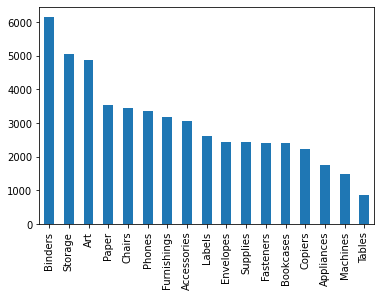

In [168]:
import matplotlib
gssd["Sub-Category"].value_counts().plot(kind="bar")

In [169]:
#Wypisanie kolumn z wartościami NaN
for col in gssd.columns:
    if gssd[col].isnull().values.any():
        print(col)            

Postal Code


In [170]:
#Usunięcię kolumny Postal Code, ponieważ nie ma większego znaczenia dla danych, a jest w niej sporo wartości NaN
gssd = gssd.dropna(axis='columns')

In [ ]:
#Normalizacja wartości float
from sklearn import preprocessing
flcols = gssd.select_dtypes(include=['float64']).columns
x = gssd.select_dtypes(include=['float64']).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normcols = pd.DataFrame(x_scaled, columns=flcols)
for col in flcols:
    gssd[col] = normcols[col]

In [172]:
gssd

Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891  31-07-2012  31-07-2012        Same Day   
1       26341    IN-2013-77878  05-02-2013  07-02-2013    Second Class   
2       25330    IN-2013-71249  17-10-2013  18-10-2013     First Class   
3       13524  ES-2013-1579342  28-01-2013  30-01-2013     First Class   
4       47221     SG-2013-4320  05-11-2013  06-11-2013        Same Day   
...       ...              ...         ...         ...             ...   
51285   29002    IN-2014-62366  19-06-2014  19-06-2014        Same Day   
51286   35398   US-2014-102288  20-06-2014  24-06-2014  Standard Class   
51287   40470   US-2013-155768  02-12-2013  02-12-2013        Same Day   
51288    9596   MX-2012-140767  18-02-2012  22-02-2012  Standard Class   
51289    6147   MX-2012-134460  22-05-2012  26-05-2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Consumer  New York City   
1        JR-16210     Justin Ritter    Corporate     Wollongong   
2        CR-12730      Craig Reiter     Consumer       Brisbane   
3        KM-16375  Katherine Murray  Home Office         Berlin   
4         RH-9495       Rick Hansen     Consumer          Dakar   
...           ...               ...          ...            ...   
51285    KE-16420   Katrina Edelman    Corporate           Kure   
51286    ZC-21910  Zuschuss Carroll     Consumer        Houston   
51287    LB-16795    Laurel Beltran  Home Office         Oxnard   
51288    RB-19795        Ross Baird  Home Office       Valinhos   
51289    MC-18100     Mick Crebagga     Consumer       Tipitapa   

                 State  ...        Product ID         Category Sub-Category  \
0             New York  ...   TEC-AC-10003033       Technology  Accessories   
1      New South Wales  ...   FUR-CH-10003950        Furniture       Chairs   
2           Queensland  ...   TEC-PH-10004664       Technology       Phones   
3               Berlin  ...   TEC-PH-10004583       Technology       Phones   
4                Dakar  ...  TEC-SHA-10000501       Technology      Copiers   
...                ...  ...               ...              ...          ...   
51285        Hiroshima  ...   OFF-FA-10000746  Office Supplies    Fasteners   
51286            Texas  ...   OFF-AP-10002906  Office Supplies   Appliances   
51287       California  ...   OFF-EN-10001219  Office Supplies    Envelopes   
51288        Săo Paulo  ...   OFF-BI-10000806  Office Supplies      Binders   
51289          Managua  ...   OFF-PA-10004155  Office Supplies        Paper   

                                            Product Name     Sales Quantity  \
0      Plantronics CS510 - Over-the-Head monaural Wir...  0.102006        7   
1              Novimex Executive Leather Armchair, Black  0.163837        9   
2                      Nokia Smart Phone, with Caller ID  0.228586        9   
3                         Motorola Smart Phone, Cordless  0.127753        5   
4                         Sharp Wireless Fax, High-Speed  0.125122        8   
...                                                  ...       ...      ...   
51285                      Advantus Thumb Tacks, 12 Pack  0.002856        5   
51286  Hoover Replacement Belt for Commercial Guardsm...  0.000000        1   
51287       #10- 4 1/8" x 9 1/2" Security-Tint Envelopes  0.000993        3   
51288                            Acco Index Tab, Economy  0.000574        2   
51289            Eaton Computer Printout Paper, 8.5 x 11  0.002692        3   

       Discount    Profit  Shipping Cost  Order Priority  
0      0.000000  0.490812       1.000000        Critical  
1      0.117647  0.420749       0.989353        Critical  
2      0.117647  0.501331       0.980633          Medium  
3      0.117647  0.433564       0.974924          Medium  
4      0.000000  0.460768       0.967298        Critical  
...         ...       ...            ...             ...  
51